## Data & imports

In [1]:
library(questionr)
library(ggplot2)

Warning message:
“package ‘questionr’ was built under R version 3.6.1”Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
df <- read.csv('liebman.csv')

In [3]:
head(df)

year,sample_weight,age,sex,nchild,yngch,real1992_earnings,race_eth,educ_lvl,employed,in_labor_force
1984,640.29,30,female,2,9,4379.825,White,Less than HS,Not Employed,Out of Labor Force
1984,694.48,21,female,0 children present,niu,2521.103,White,Some College,Employed,In Labor Force
1984,777.34,21,female,1 child present,1,10814.380,White,,Employed,In Labor Force
1984,715.03,35,female,0 children present,niu,14283.100,White,Less than HS,Employed,In Labor Force
1984,789.91,26,female,0 children present,niu,33254.230,White,,Employed,In Labor Force
1984,731.65,18,female,0 children present,niu,3739.073,White,,Not Employed,Out of Labor Force


In [4]:
# Create copy dataset where string columns are not factors so R can easily change them to numerical
df0 = read.csv('liebman.csv', stringsAsFactors = FALSE)
df1 <- data.frame(df0)

# Fiddle with copy
df1[df1 == 'niu'] <- '0'
df1[df1 == 'less than 1 year old'] <- '0'
df1$yngch <- as.numeric(df1$yngch)

## Problem 2

Summary stats

In [5]:
summary(df)

      year      sample_weight          age            sex       
 Min.   :1984   Min.   :    0.0   Min.   :16.00   female:82707  
 1st Qu.:1985   1st Qu.:  985.2   1st Qu.:20.00                 
 Median :1988   Median : 1562.3   Median :25.00                 
 Mean   :1987   Mean   : 1589.6   Mean   :26.47                 
 3rd Qu.:1989   3rd Qu.: 2028.0   3rd Qu.:32.00                 
 Max.   :1990   Max.   :10966.2   Max.   :44.00                 
                                                                
                nchild                       yngch       real1992_earnings
 0 children present:60363   niu                 :60363   Min.   :     0   
 1 child present   :11030   less than 1 year old: 2070   1st Qu.:  3415   
 2                 : 7145   1                   : 1862   Median : 10814   
 3                 : 2842   2                   : 1685   Mean   : 13828   
 4                 :  883   3                   : 1535   3rd Qu.: 20489   
 5                 :  291   5 

Data types

In [6]:
sapply(df, class)

year     sample_weight               age               sex 
        "integer"         "numeric"         "integer"          "factor" 
           nchild             yngch real1992_earnings          race_eth 
         "factor"          "factor"         "numeric"          "factor" 
         educ_lvl          employed    in_labor_force 
         "factor"          "factor"          "factor"

## Problem 3

a.

In [7]:
# Create has_child_u19 in copy

df1$has_child_u19 <- ifelse(df1$nchild != '0 children present' & df1$yngch < 19, 1, 0)


# Then send to main dataset "df"

df$has_child_u19 <- df1$has_child_u19

In [8]:
# Results on first 6 rows
head(df[,c('yngch','has_child_u19')])

yngch,has_child_u19
9,1
niu,0
1,1
niu,0
niu,0
niu,0


b.

In [9]:
df$post_eitc_expansion <- ifelse(df$year >= 1987, 1, 0)

In [10]:
# Results on first 6 rows
print('pre-1987')
head(df[,c('year','post_eitc_expansion')])

# Results on first 6 rows post 1987
print('post-1987')
head(df[df$year > 1987,c('year','post_eitc_expansion')])

[1] "pre-1987"


year,post_eitc_expansion
1984,0
1984,0
1984,0
1984,0
1984,0
1984,0


[1] "post-1987"


,year,post_eitc_expansion
37837,1988,1
37838,1988,1
37839,1988,1
37840,1988,1
37841,1988,1
37842,1988,1


## Problem 4

In [11]:
# To summarize

x <- c('age', 'employed', 'in_labor_force', 'real1992_earnings')

#Make binaries

df$employed <- ifelse(df$employed == 'Employed', 1, 0)

df$in_labor_force <- ifelse(df$in_labor_force == 'In Labor Force', 1, 0)


# For tables

newnames <- c('Child under 19?', x)

In [12]:
# Create means table & display
# 0 = No child under 19, 1 = has child under 19

means <- aggregate(df[,x], list(df$has_child_u19), 
  FUN=mean, na.rm=TRUE)
names(means) <- newnames
means

Child under 19?,age,employed,in_labor_force,real1992_earnings
0,24.75022,0.7182727,0.8087638,13522.00
1,31.41331,0.5905729,0.7042221,14861.22


In [13]:
# Education level frequency by child under 19
# 0 = No child under 19, 1 = has child under 19

table(df$has_child_u19, df$educ_lvl)[,c(2,3,4)]

   
    College + High School Less than HS
  0      3764        4559        15670
  1       704         946         5577

In [14]:
# Race frequency by child under 19
# 0 = No child under 19, 1 = has child under 19

table(df$has_child_u19, df$race_eth)

   
    Black Other White
  0  6853  2542 51948
  1  6324   720 14320

In [15]:
# Weighted education frequency by child under 19
# 0 = No child under 19, 1 = has child under 19

wtd.table(df$has_child_u19, y = df$educ_lvl, weights = df$sample_weight)[,c(2,3,4)]

  College + High School Less than HS
0   5854681     7392500     23801244
1   1093221     1507062      8750754

In [16]:
# Weighted race frequency by child under 19
# 0 = No child under 19, 1 = has child under 19

wtd.table(df$has_child_u19, y = df$race_eth, weights = df$sample_weight)

       Black      Other      White
0 12693001.5  3445993.9 81264088.9
1 11925919.9   774809.3 21369788.8

### Prompt:

"Describe (in writing) how the samples of women with versus without children under 19 differ. If there are differences, explain why a simple comparison of the employment, earnings or labor force participation after the expansion of the EITC across the two samples may not generate a causal estimate of the impact of the EITC."

### Response:

Women without children under 19 tended to be younger and more employed in terms of labor force participation and employment rates than women with children, although they had slightly smaller real earnings on average. In addition, women without children under 19 were much more likely to be White than women with children under 19 (no children u19 = ~83% white, vs ~63% White for with children u19), and women with children under 19 were much more likely to be Black (no children u19 = ~13% Black, vs 35% Black with children u19).

Simply comparing the mean values of employment and earnings data post-1987 would fail to account for the already-present differences between women with vs without children pre-1987, and would falsely atttribute the entire size of these mean differences to the effect of EITC, rather than measuring how both groups' employment data CHANGED after 1987.

## Problem 5

In [17]:
# Create has/doesnt have children sub samples

child = df[df$nchild != "0 children present",]
nchild = df[df$nchild == "0 children present",]

# For tables
x1 = c('employed', 'in_labor_force')
newnames1 = c('year',x1)

In [18]:
# Create data to plot

print('1+ Children')
employment_year_child <- aggregate(child[,x1], list(child$year), 
  FUN=mean, na.rm=TRUE)
names(employment_year_child) <- newnames1
employment_year_child

print('No Children')
employment_year_nchild <- aggregate(nchild[,x1], list(nchild$year), 
  FUN=mean, na.rm=TRUE)
names(employment_year_nchild) <- newnames1
employment_year_nchild


[1] "1+ Children"


year,employed,in_labor_force
1984,0.6056106,0.7299230
1985,0.6124053,0.7350547
1986,0.6175676,0.7327027
1988,0.5927396,0.6968236
1989,0.5986792,0.7005334
1990,0.5725766,0.6795580


[1] "No Children"


year,employed,in_labor_force
1984,0.8061819,0.9154108
1985,0.8153863,0.9209438
1986,0.8156801,0.9231720
1988,0.6429260,0.7189668
1989,0.6434291,0.7207137
1990,0.6345156,0.7122837


1+ Children Plots

[1] "1+ Children: Employment by year"


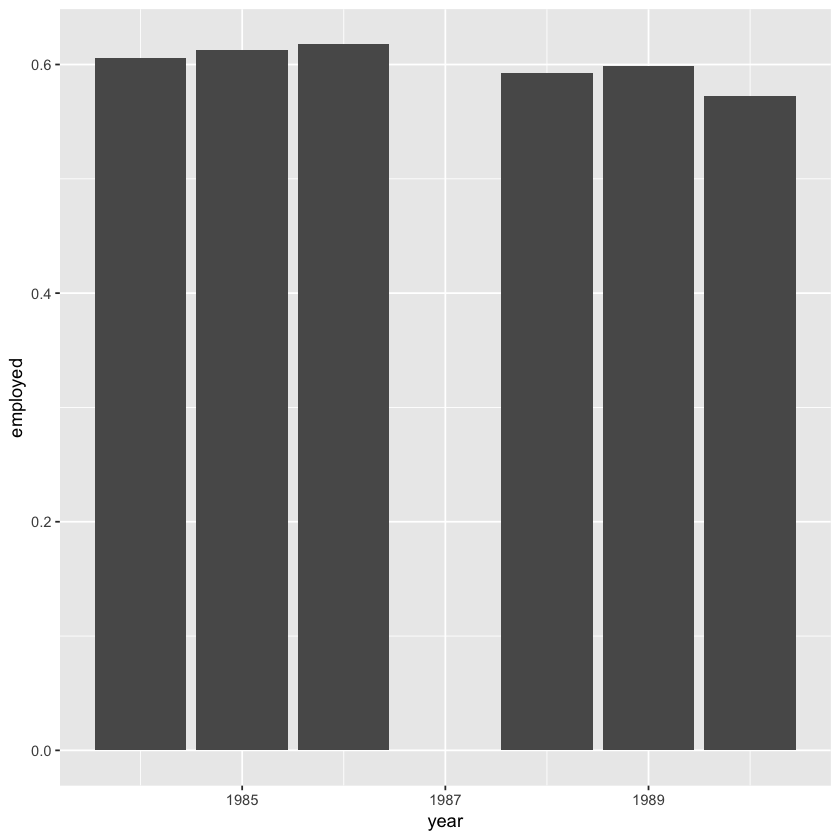

In [19]:
print('1+ Children: Employment by year')
ggplot(data=employment_year_child, aes(x=year, y=employed)) +
  geom_bar(stat="identity")

[1] "1+ Children: In Labor Force by year"


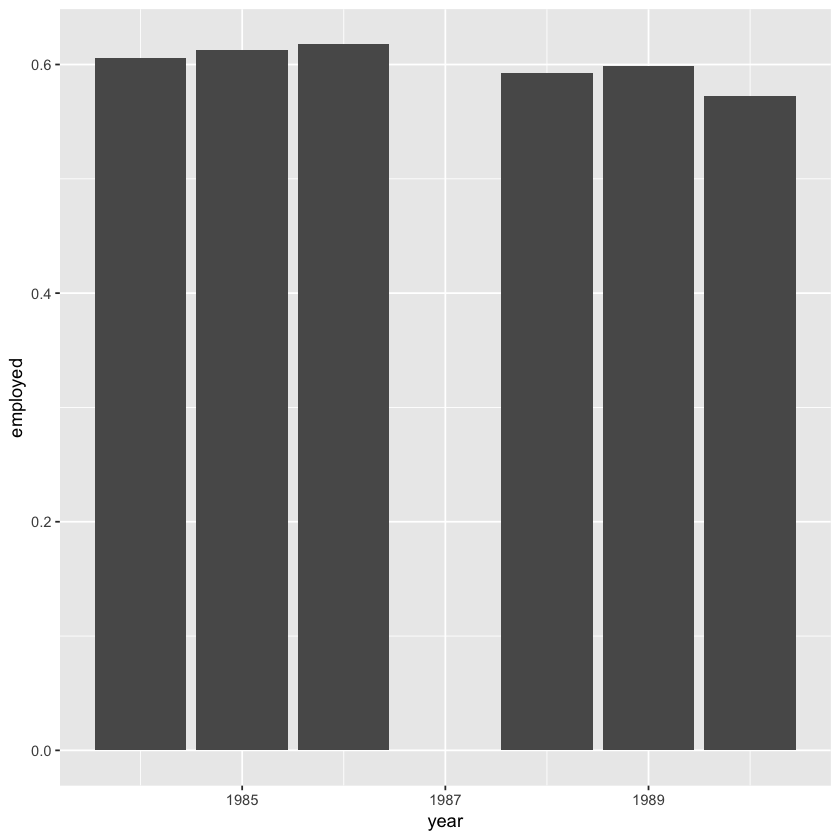

In [20]:
print('1+ Children: In Labor Force by year')
ggplot(data=employment_year_child, aes(x=year, y=employed)) +
  geom_bar(stat="identity")

No Children Plots

[1] "No Children: Employment by year"


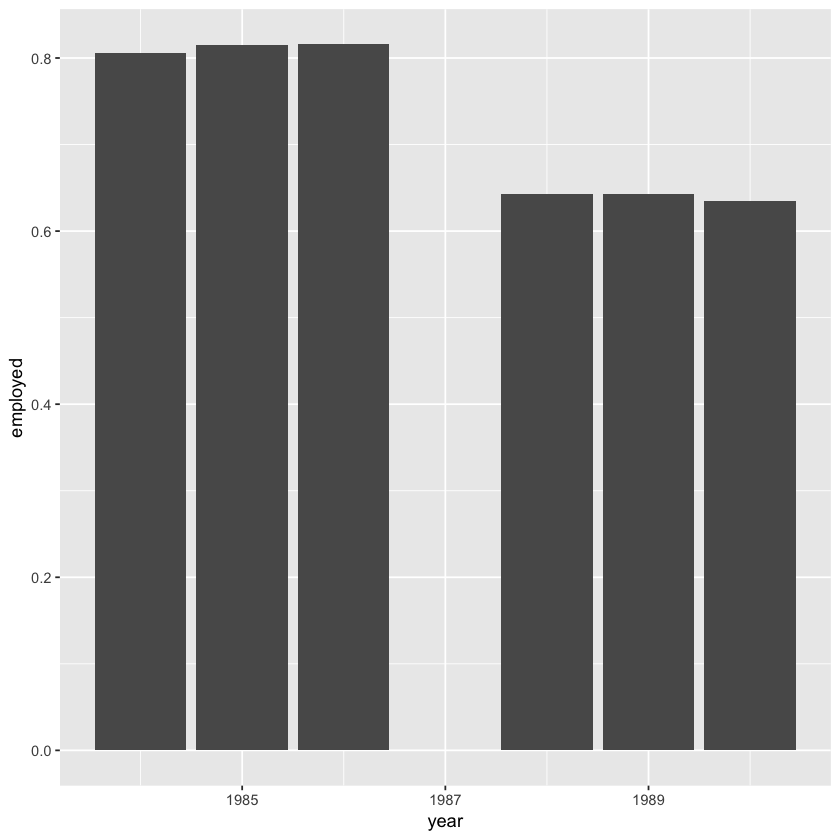

In [21]:
print('No Children: Employment by year')
ggplot(data=employment_year_nchild, aes(x=year, y=employed)) +
  geom_bar(stat="identity")

[1] "No Children: In labor force by year"


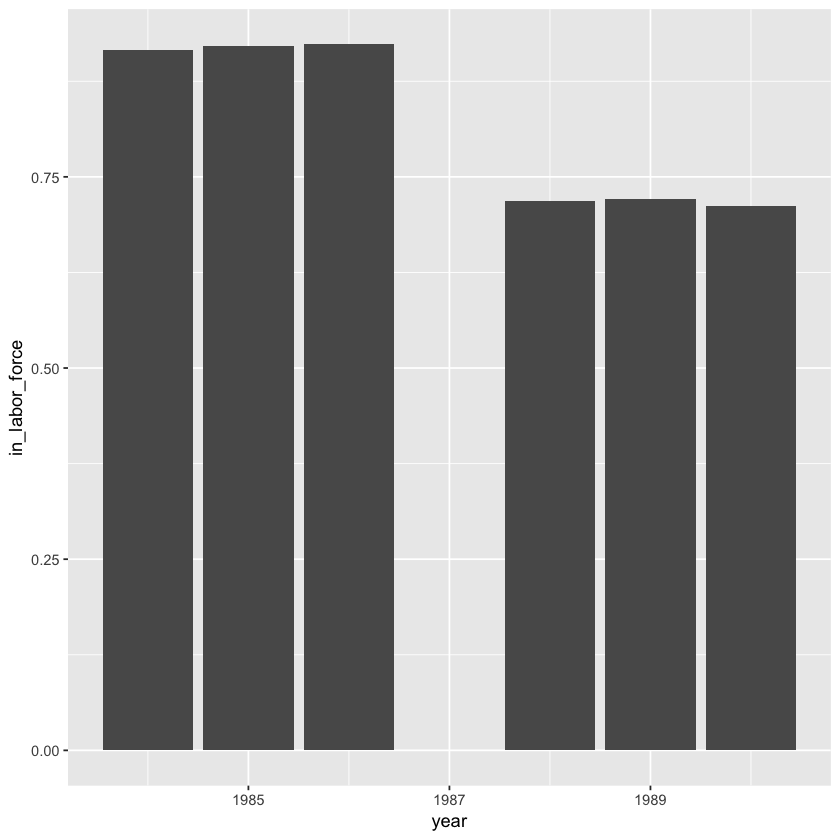

In [22]:
print('No Children: In labor force by year')
ggplot(data=employment_year_nchild, aes(x=year, y=in_labor_force)) +
  geom_bar(stat="identity")

### Prompt:

What are the implications of these graphs for the parallel trends assumption?

### Response:

The parallel trends assumption implies that the control group and treatment groups would share a time-trend in the dependent variable of interest if not for the treatment being applied to the treatment group. In this case, we can validate this by looking at the time trend in the employment data for both groups, women with and without children under 19, and note that time trends appear identical before treatment, before 1987. However, between 1986 and 1988, employment rates for women without children under 19 dropped significantly, while they did not for women with children under 19, implying a divergence in time trends beginning only after the treatment, the EITC expansion, took effect. 


## Problem 6

### Simple diff in diff

In [23]:
# Create treatment dummy

df$treatment <- df$has_child_u19*df$post_eitc_expansion


**Real earnings model**

In [24]:
simple_real_earnings <- lm(
                        real1992_earnings ~ has_child_u19 + post_eitc_expansion + treatment,
                        data=df,
                        weights=sample_weight
                        )
summary(simple_real_earnings)


Call:
lm(formula = real1992_earnings ~ has_child_u19 + post_eitc_expansion + 
    treatment, data = df, weights = sample_weight)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1350718  -370569  -115294   231340  7670463 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         13710.10      86.23 158.987  < 2e-16 ***
has_child_u19        1167.42     178.51   6.540  6.2e-11 ***
post_eitc_expansion   172.98     116.93   1.479    0.139    
treatment              49.46     244.27   0.202    0.840    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 526300 on 66568 degrees of freedom
  (16114 observations deleted due to missingness)
Multiple R-squared:  0.001483,	Adjusted R-squared:  0.001438 
F-statistic: 32.96 on 3 and 66568 DF,  p-value: < 2.2e-16


**Employment model**

In [25]:
simple_employment <- lm(
                        employed ~ has_child_u19 + post_eitc_expansion + treatment,
                        data=df,
                        weights=sample_weight
                        )
summary(simple_employment)


Call:
lm(formula = employed ~ has_child_u19 + post_eitc_expansion + 
    treatment, data = df, weights = sample_weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-85.215 -18.871   7.647  13.509  37.420 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.813744   0.002805  290.12   <2e-16 ***
has_child_u19       -0.214881   0.005330  -40.32   <2e-16 ***
post_eitc_expansion -0.163830   0.003715  -44.10   <2e-16 ***
treatment            0.142671   0.007253   19.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.15 on 82680 degrees of freedom
Multiple R-squared:  0.03844,	Adjusted R-squared:  0.03841 
F-statistic:  1102 on 3 and 82680 DF,  p-value: < 2.2e-16


**Labor force participation model**

In [26]:
simple_in_lab <- lm(
                        in_labor_force ~ has_child_u19 + post_eitc_expansion + treatment,
                        data=df,
                        weights=sample_weight
                        )
summary(simple_in_lab)


Call:
lm(formula = in_labor_force ~ has_child_u19 + post_eitc_expansion + 
    treatment, data = df, weights = sample_weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-77.077   1.799   3.989  10.883  28.034 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.920557   0.002475  371.99   <2e-16 ***
has_child_u19       -0.193549   0.004702  -41.16   <2e-16 ***
post_eitc_expansion -0.194811   0.003277  -59.44   <2e-16 ***
treatment            0.151433   0.006399   23.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.01 on 82680 degrees of freedom
Multiple R-squared:  0.05368,	Adjusted R-squared:  0.05365 
F-statistic:  1563 on 3 and 82680 DF,  p-value: < 2.2e-16


### Diff in diff with controls

In [27]:
# Make age squared column

df$age2 <- df$age*df$age

# Make make k-1 dummies for categorical vars

# Other = base race

df$white <- ifelse(df$race_eth == 'White', 1, 0)

df$black <- ifelse(df$race_eth == 'Black', 1, 0)

# Less than highschool = base education level

# Note that every dummy column will check if the education level value is blank, and insert NA

df$college <- ifelse(df$educ_lvl == 'College +', 1, ifelse(df$educ_lvl == '', NA, 0))

df$some_college <- ifelse(df$educ_lvl == 'Some College', 1, ifelse(df$educ_lvl == '', NA, 0))

df$high_school <- ifelse(df$educ_lvl == 'High School', 1, ifelse(df$educ_lvl == '', NA, 0))


**Real earnings model**

In [28]:
real_earnings <- lm(
                        real1992_earnings ~ has_child_u19 + post_eitc_expansion + treatment
                                            + age + age2 + white + black + high_school
                                            + some_college + college,
                        data=df,
                        weights=sample_weight
                        )
summary(real_earnings)


Call:
lm(formula = real1992_earnings ~ has_child_u19 + post_eitc_expansion + 
    treatment + age + age2 + white + black + high_school + some_college + 
    college, data = df, weights = sample_weight)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-2196523  -237204   -17634   154149  8486315 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -42379.426    841.253 -50.377  < 2e-16 ***
has_child_u19        -4164.054    210.410 -19.790  < 2e-16 ***
post_eitc_expansion    315.701    114.795   2.750 0.005959 ** 
treatment               54.786    267.990   0.204 0.838017    
age                   3144.354     60.046  52.366  < 2e-16 ***
age2                   -39.197      1.004 -39.050  < 2e-16 ***
white                  129.796    290.685   0.447 0.655226    
black                -1086.526    319.713  -3.398 0.000678 ***
high_school           2413.057    193.645  12.461  < 2e-16 ***
some_college          4840.336    148.4

**Employment model**

In [29]:
employment <- lm(
                 employed ~ has_child_u19 + post_eitc_expansion + treatment
                            + age + age2 + white + black + high_school
                            + some_college + college,
                 data=df,
                 weights=sample_weight
                )
summary(employment)


Call:
lm(formula = employed ~ has_child_u19 + post_eitc_expansion + 
    treatment + age + age2 + white + black + high_school + some_college + 
    college, data = df, weights = sample_weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-98.330 -13.300   4.304  11.187  59.296 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.559e-01  2.730e-02   5.711 1.13e-08 ***
has_child_u19       -2.249e-01  6.850e-03 -32.833  < 2e-16 ***
post_eitc_expansion -1.711e-01  4.004e-03 -42.732  < 2e-16 ***
treatment            1.409e-01  8.576e-03  16.424  < 2e-16 ***
age                  2.374e-02  1.967e-03  12.070  < 2e-16 ***
age2                -2.701e-04  3.314e-05  -8.151 3.69e-16 ***
white                8.253e-02  9.306e-03   8.868  < 2e-16 ***
black               -5.325e-02  1.011e-02  -5.266 1.40e-07 ***
high_school          1.796e-01  6.442e-03  27.882  < 2e-16 ***
some_college         2.759e-01  4.703e-03  58.664  < 2e-16

**In labor force model**

In [30]:
in_lab <- lm(
             in_labor_force ~ has_child_u19 + post_eitc_expansion + treatment
                            + age + age2 + white + black + high_school
                            + some_college + college,
             data=df,
             weights=sample_weight
             )
summary(in_lab)


Call:
lm(formula = in_labor_force ~ has_child_u19 + post_eitc_expansion + 
    treatment + age + age2 + white + black + high_school + some_college + 
    college, data = df, weights = sample_weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-78.258  -4.562   4.059   9.563  47.591 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.379e-01  2.467e-02  13.699  < 2e-16 ***
has_child_u19       -2.127e-01  6.190e-03 -34.358  < 2e-16 ***
post_eitc_expansion -2.115e-01  3.618e-03 -58.462  < 2e-16 ***
treatment            1.518e-01  7.749e-03  19.596  < 2e-16 ***
age                  2.023e-02  1.777e-03  11.382  < 2e-16 ***
age2                -2.318e-04  2.995e-05  -7.740 1.01e-14 ***
white                8.673e-02  8.409e-03  10.314  < 2e-16 ***
black                4.173e-04  9.136e-03   0.046    0.964    
high_school          1.584e-01  5.821e-03  27.217  < 2e-16 ***
some_college         2.442e-01  4.250e-03  57.466  <

### Prompt:

Do you find that the expansion of the EITC generated a statistically significant change in the real earnings, employment rate, or labor force participation rate?  Is the effect economically significant?  Do your results differ when you include the additional control variables (age, race, education level)?

### Response:

In the simple model, the EITC generated a statistically significant impact on employment rate and labor force participation, but not on real earnings. The effects on employment rate and labor force participation were also economically significant in these models, both increasing the probability that the unit was employed or in the labor force by more than 10 percentage points. After expanding the model to include more control variables, this continued to be the case. Treatment remained statistically significant in the latter two models, and the coefficients for treatment retained similar values to those from the simple model. Treatment still did not have a statistically or economically significant impact on real earnings.

## Problem 7

In [31]:
# Create placebo dummy, placebo treatment variables

df$post_1985 <- ifelse(df$year == 1986, 1, 0)

df$treatment_placebo <- df$post_1985*df$has_child_u19

# Create subset of pre-1987 data

df_pre_87 <- df[df$year < 1987,]

**Real earnings placebo model**

In [32]:
real_earnings_placebo <- lm(
                            real1992_earnings ~ has_child_u19 + post_1985 + treatment_placebo
                                              + age + age2 + white + black + high_school
                                              + some_college + college,
                        data=df_pre_87,
                        weights=sample_weight
                        )
summary(real_earnings_placebo)


Call:
lm(formula = real1992_earnings ~ has_child_u19 + post_1985 + 
    treatment_placebo + age + age2 + white + black + high_school + 
    some_college + college, data = df_pre_87, weights = sample_weight)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1594912  -223293   -13006   154778  5595535 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -43768.21    1188.10 -36.839  < 2e-16 ***
has_child_u19      -3877.17     246.43 -15.734  < 2e-16 ***
post_1985            667.06     166.84   3.998 6.41e-05 ***
treatment_placebo     62.94     385.88   0.163   0.8704    
age                 3210.26      84.19  38.133  < 2e-16 ***
age2                 -40.87       1.41 -28.977  < 2e-16 ***
white                852.80     427.04   1.997   0.0458 *  
black               -859.35     466.15  -1.844   0.0653 .  
high_school         2545.08     271.56   9.372  < 2e-16 ***
some_college        4927.42     205.09  24.026  < 2e-16 ***
coll

**Employment placebo model**

In [33]:
employment_placebo <- lm(
                         employed ~ has_child_u19 + post_1985 + treatment_placebo
                                  + age + age2 + white + black + high_school
                                  + some_college + college,
                         data=df_pre_87,
                         weights=sample_weight
                        )
summary(employment_placebo)


Call:
lm(formula = employed ~ has_child_u19 + post_1985 + treatment_placebo + 
    age + age2 + white + black + high_school + some_college + 
    college, data = df_pre_87, weights = sample_weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-94.356   0.473   3.731   8.866  46.504 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        9.136e-01  3.920e-02  23.308  < 2e-16 ***
has_child_u19     -1.597e-01  7.917e-03 -20.172  < 2e-16 ***
post_1985         -1.156e-04  5.837e-03  -0.020    0.984    
treatment_placebo -3.377e-03  1.214e-02  -0.278    0.781    
age               -2.249e-02  2.769e-03  -8.119  4.9e-16 ***
age2               4.047e-04  4.653e-05   8.698  < 2e-16 ***
white              7.333e-03  1.441e-02   0.509    0.611    
black             -1.444e-01  1.548e-02  -9.326  < 2e-16 ***
high_school        2.150e-01  9.132e-03  23.544  < 2e-16 ***
some_college       2.892e-01  6.486e-03  44.597  < 2e-16 ***
college     

**In labor force placebo model**

In [34]:
in_lab_placebo <- lm(
                     in_labor_force ~ has_child_u19 + post_1985 + treatment_placebo
                                    + age + age2 + white + black + high_school
                                    + some_college + college,
                     data=df_pre_87,
                     weights=sample_weight
                    )
summary(in_lab_placebo)


Call:
lm(formula = in_labor_force ~ has_child_u19 + post_1985 + treatment_placebo + 
    age + age2 + white + black + high_school + some_college + 
    college, data = df_pre_87, weights = sample_weight)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-81.860  -0.079   1.497   5.980  36.815 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.332e+00  3.038e-02  43.849  < 2e-16 ***
has_child_u19     -1.359e-01  6.135e-03 -22.147  < 2e-16 ***
post_1985          2.805e-03  4.523e-03   0.620    0.535    
treatment_placebo -6.566e-03  9.404e-03  -0.698    0.485    
age               -4.184e-02  2.146e-03 -19.498  < 2e-16 ***
age2               6.774e-04  3.606e-05  18.787  < 2e-16 ***
white              1.170e-02  1.116e-02   1.048    0.295    
black             -5.793e-02  1.200e-02  -4.829 1.38e-06 ***
high_school        1.860e-01  7.077e-03  26.291  < 2e-16 ***
some_college       2.480e-01  5.026e-03  49.346  < 2e-16 ***
colleg

### Prompt:

If you conduct a difference in differences estimate of earnings, employment and labor force participation (as the outcome variables) that compares 1984 and 1985 versus 1986, do you find an effect of the non-existent (placebo) EITC expansion in 1986?  Explain the implications of this placebo test for your confidence in your results for these different outcome variables.

### Response:

In all 3 models, the placebo treatment variables had gigantic p-values (smallest one around 0.4), and were thus statistically insignificant. This gives me increased confidence in the method of causal estimation via regression and significance testing, it is important that the same methods I used to confirm the effect of a real EITC expansion would not also confirm the effect for a non-existent one.